# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2199 non-null   int64  
 1   Título               2199 non-null   object 
 2   Nota                 1559 non-null   float64
 3   N_Avaliações         1559 non-null   float64
 4   Desconto             874 non-null    float64
 5   Marca                2199 non-null   object 
 6   Material             1332 non-null   object 
 7   Gênero               2120 non-null   object 
 8   Temporada            2199 non-null   object 
 9   Review1              1515 non-null   object 
 10  Review2              1354 non-null   object 
 11  Review3              1233 non-null   object 
 12  Qtd_Vendidos         2199 non-null   object 
 13  Preço                1964 non-null   float64
 14  Nota_MinMax          1559 non-null   float64
 15  N_Avaliações_MinMax  1559 non-null   f

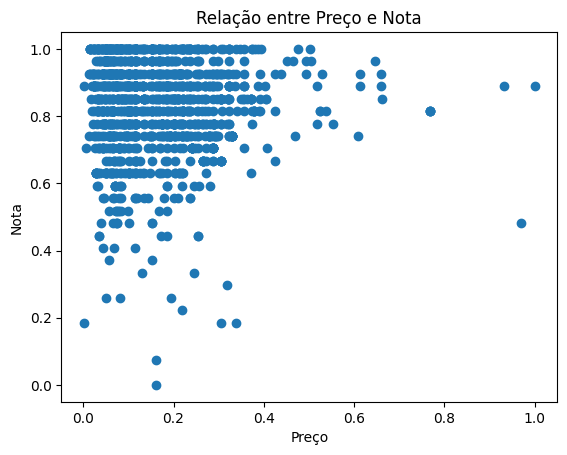

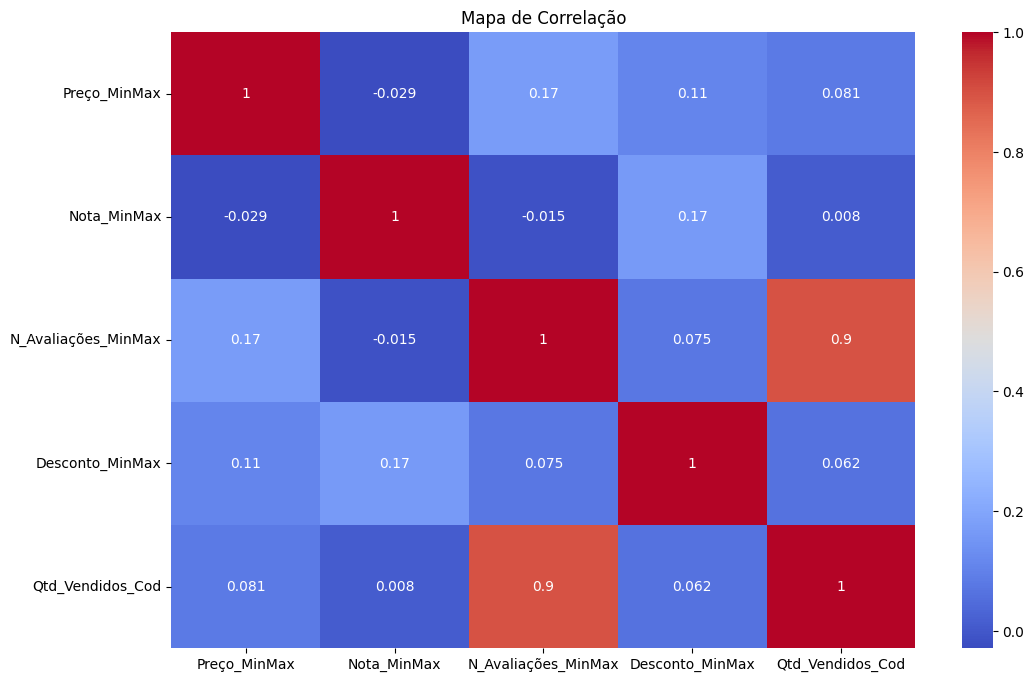

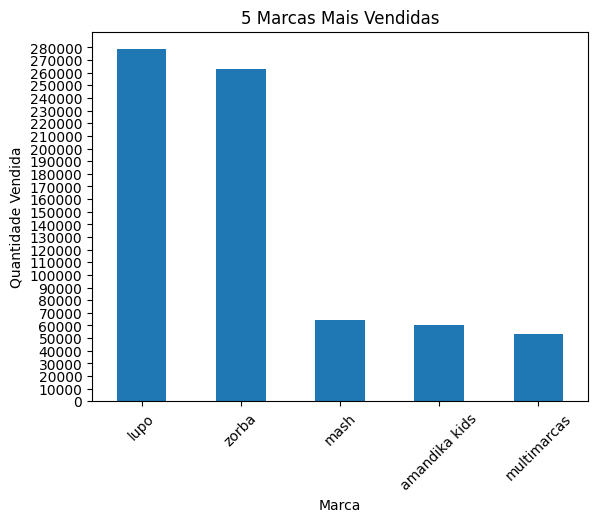

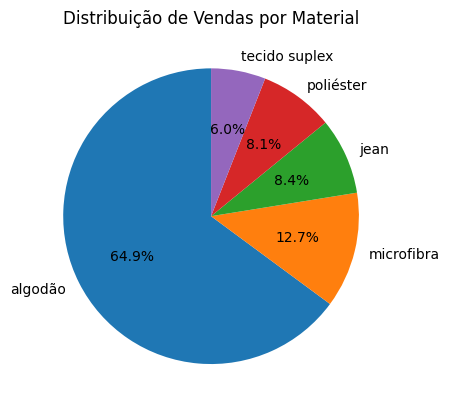

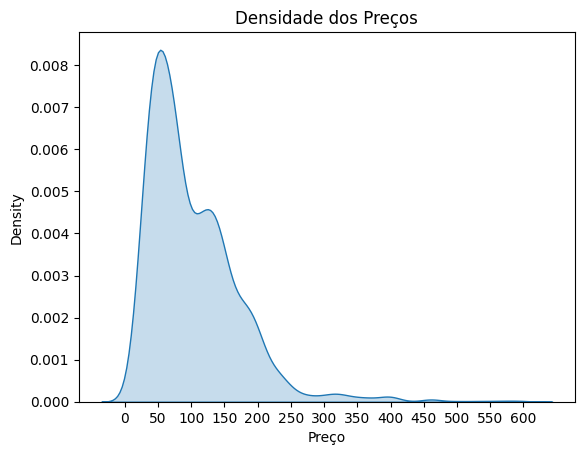

,Marca,Marca_Cod
0,toronto uniformes profissionais,781
1,lupo,463
2,zorba,838
3,mash,494
4,menina linda,509
...,...,...
2194,use tático,792
2195,destaq,227
2196,inoffensive,373
2197,balão magico kids,98


In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np



df = pd.read_csv('ecommerce_preparados.csv')
df.head()
#visualização inicial dos dados dos nomes das colunas seus conteúdos, tipos e formatações:
df.info()
print('estatísticas', df.describe()) #É possível observar indícios da distribuição e a dispersão(o quanto os dados se afastam da média através do desvio padrão std) dos dados.
#São 2199 linhas no total distribuidos em 24 colunas, sendo 11 da categoria float, 4 na inteiro e 9 na object.
#É possível observar a presença de valores nulos em todas as colunas. Também colunas já normalizadas como nota, preço e desconto_MinMax,
#frequências Marca e material_freq e a codificação de variaveis categoricas como marca e material.
print('Observação individual de nulos', df.isnull().sum())
print('% para evitar distorção', df.isnull().mean()*100)
print('Duplicados', df.duplicated().sum())
df.head()


#Gráfico de dispersão: que investiga a correlação entre o preço e a nota para avaliar satisfação
plt.figure()
plt.scatter(df['Preço_MinMax'], df['Nota_MinMax'])
plt.title('Relação entre Preço e Nota')
plt.xlabel('Preço')
plt.ylabel('Nota')
plt.show()
#A maior parte dos produtos vendidos não estão nas faixas mais altas de valor, mas possuem uma boa aceitação pelos consumidores.
#O aumento do valor do produto implica em menos avaliações. Dessa forma o preço tem correlação baixa com a nota.

#Mapa de Calor
plt.figure(figsize=(12,8))
sns.heatmap(df[['Preço_MinMax','Nota_MinMax','N_Avaliações_MinMax','Desconto_MinMax','Qtd_Vendidos_Cod']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()
#Observação das variáveis centrais para dinâmica de negócio. As únicas variáveis que apresentaram correlação expressiva foram número de avaliações e quantidade vendida
#demonstrando que os produtos mais vendidos tendem a receber mais avaliações. As outras são muito próximas de zero ou até mesmo inferiores como preço e nota também explorada no gráfico de dispersão acima.


# Gráfico de barras
vendas_marca = df.groupby('Marca')['Qtd_Vendidos_Cod'].sum()
top_5_marcas = vendas_marca.sort_values(ascending=False).head(5)
top_5_marcas.plot(kind='bar')
plt.title('5 Marcas Mais Vendidas')
plt.xlabel('Marca')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
max_valor = top_5_marcas.max()
plt.yticks(np.arange(0, max_valor + 10000, 10000))
plt.show()
#Lupo e Zorba são as marcas mais vendidas.


#Gráfico de Pizza
vendas_material = df.groupby('Material')['Qtd_Vendidos_Cod'].sum().nlargest(5)

vendas_material.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribuição de Vendas por Material')
plt.ylabel('')
plt.show()
#Mostra quais os materias mais desejados pelos clientes no caso mais de 60% opta pelo algodão, microfibra, djeans, poliéster e suplex juntos representam menos de 50% das vendas.

#Gráfico de densidade
plt.figure()
sns.kdeplot(df['Preço'].dropna(), fill=True)
plt.title('Densidade dos Preços')
plt.xlabel('Preço')
plt.xticks(np.arange(0, df['Preço'].max() + 50, 50))
plt.show()
#Avalia onde estão concentrados os preços das mercadorias, o público alvo e necessidade de ajuste do valor cobrado. No caso a maior parte deles está entre 0 e 150.

df[['Qtd_Vendidos', 'Qtd_Vendidos_Cod']]
df[['Marca', 'Marca_Cod']]


